In [1]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt
from music_theory import sound, fft4plot

%load_ext autoreload
%autoreload 2
%matplotlib inline

# 纯音
## 实验1.1
绘制简谐波 $y = \sin(2\pi\cdot440t)$的波形图，并播放

Text(0.5, 1.0, 'y = sin(2pi*440t)')

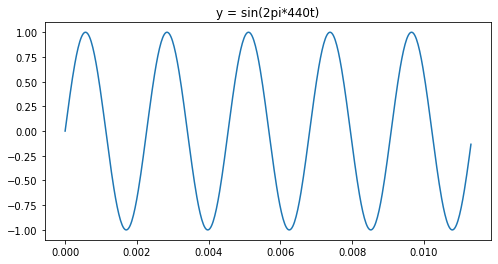

In [2]:
fs = 44100
t = np.arange(0,1, 1/fs)
signal0 = np.sin(2 * np.pi * 440 * t)
plt.figure(figsize=(8,4))
plt_size =500
x = t[:plt_size]
y = signal0[:plt_size]
plt.plot(x, y)
plt.title('y = sin(2pi*440t)')

In [3]:
sound(signal0, fs)

## 实验1.2
比较$y_1 = \sin(2\pi\cdot440t+\varphi_1)$和$y_2 = \sin(2\pi\cdot440t+\varphi_2)$以及它们的合成的声波$y_3 = (y_1+y_2)/2$的声音

实际上，相同频率的波，合成之后，频率不变

$$\begin{aligned}
2y_3 =& y_1 + y_2 = \sin(\omega t + \varphi_1) + \sin(\omega t + \varphi_2)\\
=&a_1 \sin(\omega t) + b_1 \sin(\omega t) + a_2 \sin(\omega t) + b_2 \sin(\omega t)\\
=&\frac{A}{2}\sin(\omega t + \varphi_3)
\end{aligned}$$

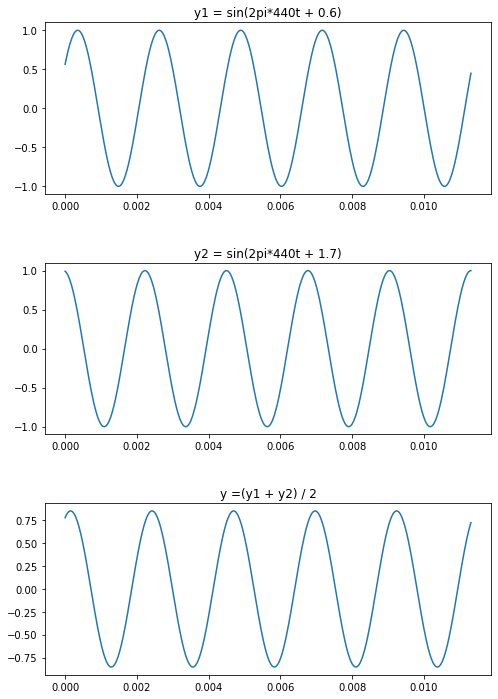

In [4]:
phi1, phi2 = 0.6, 1.7
signal1 = np.sin(2 * np.pi * 440 * t + phi1)
signal2 = np.sin(2 * np.pi * 440 * t + phi2)
signal3 = (signal1+ signal2) / 2

plt.figure(figsize=(8,12))
plt.subplot(311)
plt_size =500
x = t[:plt_size]
y1 = signal1[:plt_size]
plt.plot(x, y1)
plt.title('y1 = sin(2pi*440t + {})'.format(phi1))
plt.subplot(312)
y2 = signal2[:plt_size]
plt.plot(x, y2)
plt.title('y2 = sin(2pi*440t + {})'.format(phi2))
plt.subplots_adjust(hspace=0.4)
plt.subplot(313)
y3 = signal3[:plt_size]
plt.plot(x, y3)
plt.title('y =(y1 + y2) / 2')
plt.subplots_adjust(hspace=0.4)
plt.show()


In [5]:
sound(signal1, fs)
sound(signal2, fs)
sound(signal3, fs)

# 泛音
## 实验1.3

In [6]:
f = wave.open('resources/piano/A4.wav', 'rb')
bin_dat = f.readframes(f.getnframes())
decode =  np.array(struct.unpack('{}h'.format(f.getnframes()), bin_dat))
rate = f.getframerate()
f.close()

In [8]:
vol = np.max(decode) / (2**15)
sound(decode, rate, 0.5 if vol < 0.5 else vol)

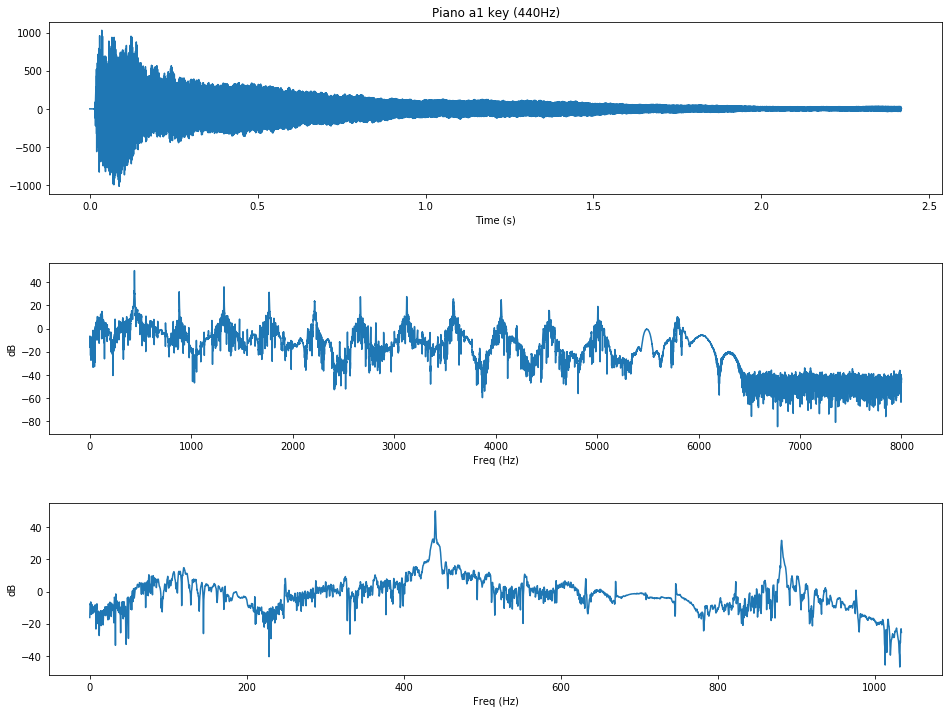

In [32]:
t_size = len(decode)
t = np.linspace(0, t_size / rate, t_size)
lgyf, freqs = fft4plot(decode, rate, 8000)

plt.figure(figsize=(16,12))
plt.subplot(311)
plt.plot(t, decode)
plt.xlabel('Time (s)')
plt.title('Piano a1 key (440Hz)')
plt.subplot(312)
plt.plot(freqs, lgyf)
plt.xlabel('Freq (Hz)')
plt.ylabel('dB')
plt.subplots_adjust(hspace=0.4)
plt.subplot(313)
plt.plot(freqs[:2500], lgyf[:2500])
plt.xlabel('Freq (Hz)')
plt.ylabel('dB')
plt.subplots_adjust(hspace=0.4)
plt.show()

# 拍音
## 实验1.4

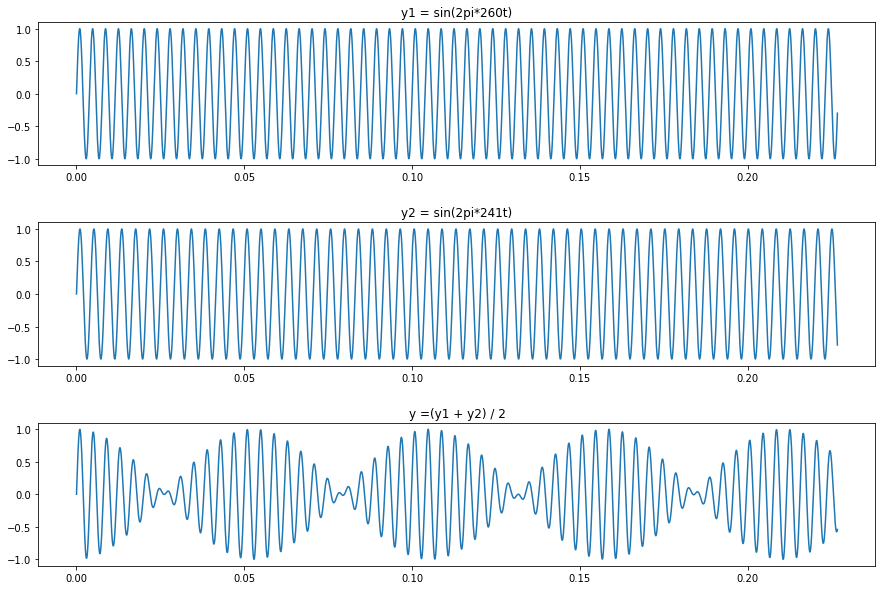

In [28]:
omega1, omega2 = 260, 241
signal1 = np.sin(2 * np.pi * omega1 * t)
signal2 = np.sin(2 * np.pi * omega2 * t)
signal3 = (signal1+ signal2) / 2

plt.figure(figsize=(15,10))
plt.subplot(311)
plt_size =10000
x = t[:plt_size]
y1 = signal1[:plt_size]
plt.plot(x, y1)
plt.title('y1 = sin(2pi*{}t)'.format(omega1))
plt.subplot(312)
y2 = signal2[:plt_size]
plt.plot(x, y2)
plt.title('y2 = sin(2pi*{}t)'.format(omega2))
plt.subplots_adjust(hspace=0.4)
plt.subplot(313)
y3 = signal3[:plt_size]
plt.plot(x, y3)
plt.title('y =(y1 + y2) / 2')
plt.subplots_adjust(hspace=0.4)
plt.show()

In [29]:
sound(signal1, fs)
sound(signal2, fs)
sound(signal3, fs)